<a href="https://colab.research.google.com/github/DAG00DAG33/ML-Languages/blob/master/Pytorch/Pytorch_Dedos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch #
import torch.nn as nn #
import torch.optim as optim #

import numpy as np

from PIL import Image #
import matplotlib.pyplot as plt #

import torchvision.transforms as transforms #
import torchvision


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sys
sys.path.insert(1, '/content/drive/My Drive/ML/Lenguajes')


from herr import *

#Input data

In [0]:
DATA_PATH = '/content/drive/My Drive/ML/Lenguajes/datasets/'
X_train, Y_train, X_test, Y_test = load_dataset(DATA_PATH + 'baseDeDatos_train.h5', DATA_PATH + 'baseDeDatos_test.h5')
X_train = np.moveaxis(X_train, 3, 1)
X_test = np.moveaxis(X_test, 3, 1)




In [0]:
BATCH_SIZE = 10

In [0]:
transform = transforms.Compose(
    [torchvision.transforms.RandomHorizontalFlip(p=0.5),
     transforms.ToTensor()])
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
    
BATCH_SIZE = 100

tensor_x_train = torch.stack([torch.Tensor(X_train[i]) for i in range(X_train.shape[0])]) # transform to torch tensors
tensor_y_train = torch.stack([torch.Tensor(Y_train[i]) for i in range(Y_train.shape[0])])

my_train_dataset = torch.utils.data.TensorDataset(tensor_x_train,tensor_y_train) # create your datset
trainloader = torch.utils.data.DataLoader(my_train_dataset, batch_size=BATCH_SIZE, shuffle=True) # create your dataloader


tensor_x_test = torch.stack([torch.Tensor(X_test[i]) for i in range(X_test.shape[0])]) # transform to torch tensors
tensor_y_test = torch.stack([torch.Tensor(Y_test[i]) for i in range(Y_test.shape[0])])

my_test_dataset = torch.utils.data.TensorDataset(tensor_x_test,tensor_y_test) # create your datset
testloader = torch.utils.data.DataLoader(my_test_dataset, batch_size=BATCH_SIZE, shuffle=True) # create your dataloader

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

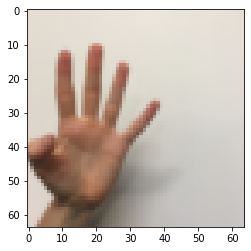

In [12]:


unloader = transforms.ToPILImage()  # reconvert into PIL image

def imshow(tensor, title=None):
    plt.figure()
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    if len(image.shape) == 4:
      image = image.squeeze(0)      # remove the fake batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)



imshow(images[0])

#Model

In [0]:
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

In [0]:
IN_SHAPE = (3,64,64)

In [20]:
class Net(nn.Module):
    def __init__(self,  num_classes, dropout_prob=0.3):
        super(Net, self).__init__()
        self.pipe = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8,
                      kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels=8, out_channels=16,
                      kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(2),


            nn.Conv2d(in_channels=16, out_channels=16,
                      kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels=16, out_channels=32,
                      kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(2),

            nn.Conv2d(in_channels=32, out_channels=32,
                      kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels=32, out_channels=32,
                      kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(2),

            Flatten(),
            nn.Linear(2048, num_classes),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.pipe(x)


net = Net(6).to(device)
net(images.to(device))


tensor([[0.1694, 0.1693, 0.1710, 0.1679, 0.1580, 0.1644],
        [0.1694, 0.1700, 0.1704, 0.1688, 0.1581, 0.1633],
        [0.1696, 0.1691, 0.1704, 0.1683, 0.1586, 0.1640],
        [0.1694, 0.1700, 0.1705, 0.1685, 0.1581, 0.1635],
        [0.1698, 0.1691, 0.1704, 0.1684, 0.1585, 0.1638],
        [0.1693, 0.1697, 0.1707, 0.1683, 0.1582, 0.1638],
        [0.1693, 0.1698, 0.1707, 0.1685, 0.1581, 0.1636],
        [0.1696, 0.1698, 0.1702, 0.1687, 0.1579, 0.1638],
        [0.1692, 0.1696, 0.1703, 0.1683, 0.1585, 0.1640],
        [0.1694, 0.1699, 0.1706, 0.1684, 0.1582, 0.1635],
        [0.1695, 0.1697, 0.1707, 0.1681, 0.1579, 0.1641],
        [0.1694, 0.1694, 0.1706, 0.1682, 0.1583, 0.1641],
        [0.1700, 0.1695, 0.1705, 0.1682, 0.1581, 0.1638],
        [0.1694, 0.1699, 0.1705, 0.1685, 0.1581, 0.1636],
        [0.1693, 0.1699, 0.1707, 0.1682, 0.1582, 0.1638],
        [0.1692, 0.1698, 0.1709, 0.1678, 0.1581, 0.1643],
        [0.1694, 0.1694, 0.1706, 0.1681, 0.1582, 0.1643],
        [0.169

#Train

In [32]:
#lossFunc = nn.CrossEntropyLoss()
lossFunc = nn.BCELoss()
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = torch.optim.Adam(net.parameters(), lr=3e-4)


def train(model, trainloader, optimizer, epochs, device):
    #model.train()
    n=3
    running_loss = 0.0
    losses = []
    for epoch in range(epochs):
      for i, data in enumerate(trainloader, 0):
          # get the inputs
          images=data[0].to(device)
          labels=data[1].to(device)

          #labels = labels.to(device=device, dtype=torch.int64)
          optimizer.zero_grad()

          outputs = model(images)
          loss = lossFunc(outputs, labels)

          loss.backward()

          optimizer.step()

          running_loss += loss.item()
          if i % n == n-1: 
              print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, (i + 1)*BATCH_SIZE, running_loss / BATCH_SIZE*n))
              losses.append(running_loss / BATCH_SIZE*n)
              running_loss = 0.0
    return losses


losses = train(net,trainloader, optimizer, 10, device)

[1,   300] loss: 0.023
[1,   600] loss: 0.023
[1,   900] loss: 0.019
[1,  1200] loss: 0.011
[1,  1500] loss: 0.015
[2,   300] loss: 0.019
[2,   600] loss: 0.013
[2,   900] loss: 0.011
[2,  1200] loss: 0.013
[2,  1500] loss: 0.012
[3,   300] loss: 0.016
[3,   600] loss: 0.013
[3,   900] loss: 0.013
[3,  1200] loss: 0.011
[3,  1500] loss: 0.012
[4,   300] loss: 0.015
[4,   600] loss: 0.012
[4,   900] loss: 0.011
[4,  1200] loss: 0.011
[4,  1500] loss: 0.013
[5,   300] loss: 0.016
[5,   600] loss: 0.011
[5,   900] loss: 0.010
[5,  1200] loss: 0.012
[5,  1500] loss: 0.011
[6,   300] loss: 0.014
[6,   600] loss: 0.011
[6,   900] loss: 0.010
[6,  1200] loss: 0.010
[6,  1500] loss: 0.012
[7,   300] loss: 0.012
[7,   600] loss: 0.012
[7,   900] loss: 0.009
[7,  1200] loss: 0.009
[7,  1500] loss: 0.011
[8,   300] loss: 0.017
[8,   600] loss: 0.011
[8,   900] loss: 0.010
[8,  1200] loss: 0.010
[8,  1500] loss: 0.009
[9,   300] loss: 0.014
[9,   600] loss: 0.011
[9,   900] loss: 0.010
[9,  1200] 

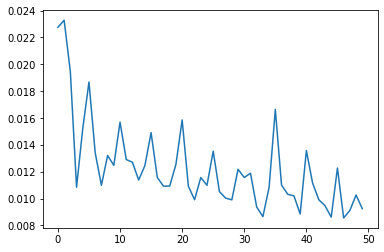

In [33]:
plt.plot(losses)

#Test

In [36]:
def test(model, testloader, device, display=False):
  model.eval()
  correct = 0
  total = 0
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = model(images.to(device))
          _, predicted = torch.max(outputs.data, 1)
          _, correctLabel = torch.max(labels.to(device), 1)
          total += labels.size(0)
          correct += (predicted == correctLabel).sum().item()
  if display:
    print('Accuracy of the network on the test images: %d %%' % (
        100 * correct / total))
  return correct/total
  
test(net, testloader, device, display=True)

Accuracy of the network on the test images: 77 %


0.7740259740259741